Car Price Prediction

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


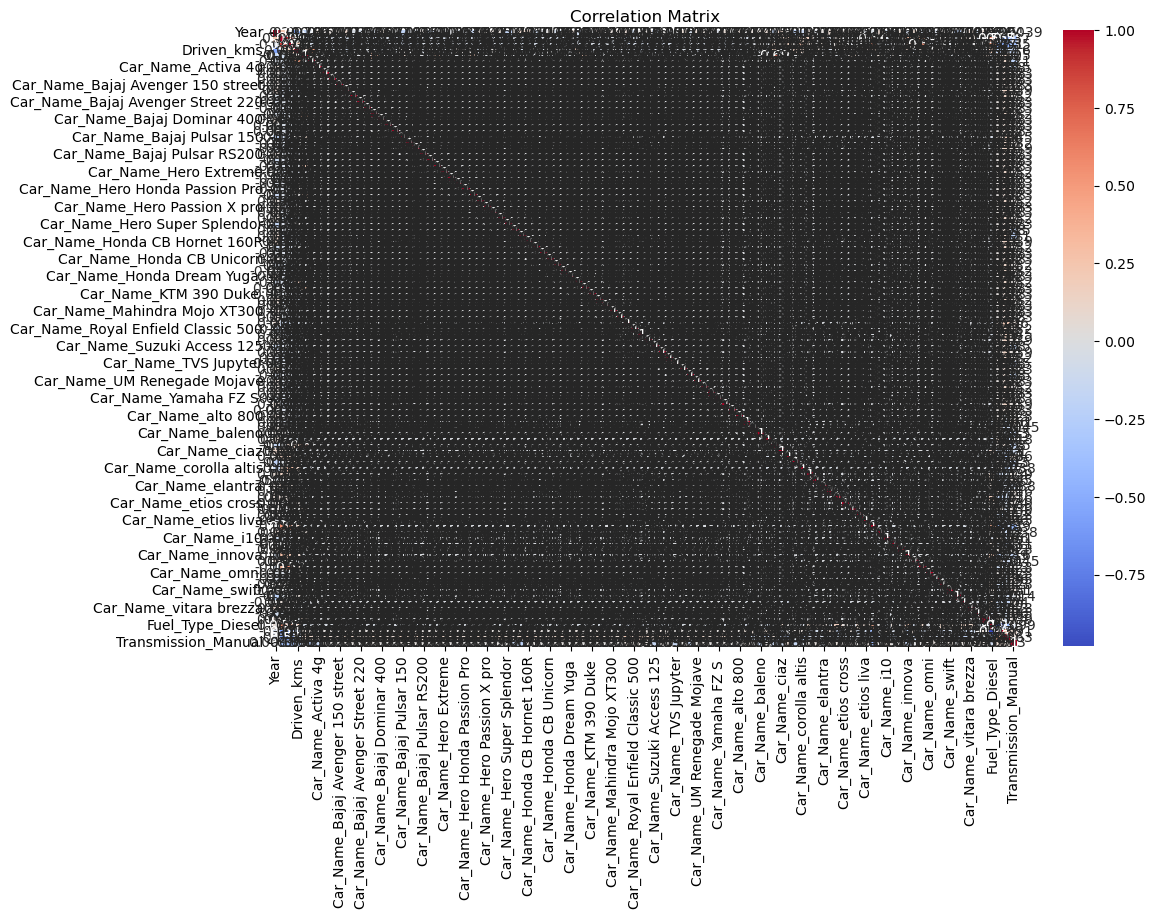

In [27]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

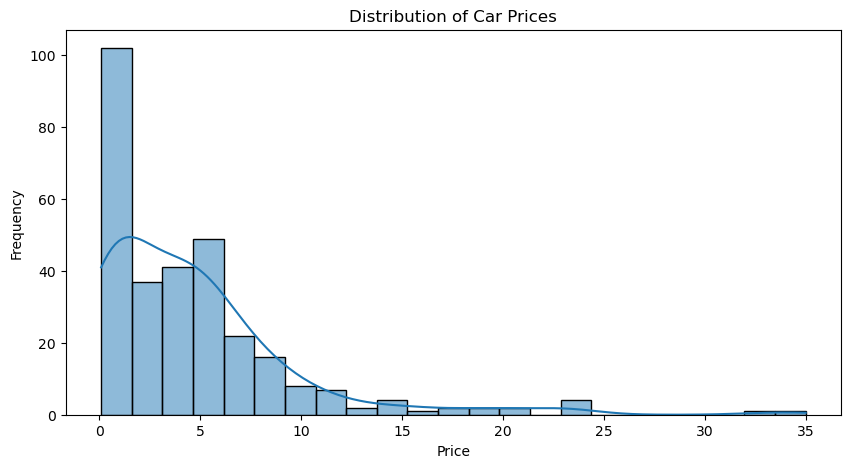

In [28]:
# Distribution of the target variable (price)
plt.figure(figsize=(10, 5))
sns.histplot(df['Selling_Price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [30]:
# Pair plot
plt.figure(figsize=(15, 10))
sns.pairplot(df)
plt.title('Pair Plot of All Numerical Features')
plt.show()

In [ ]:
# Box plots for categorical features
plt.figure(figsize=(15, 10))
sns.boxplot(x='fueltype', y='price', data=df)
plt.title('Price Distribution by Fuel Type')
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(x='aspiration', y='price', data=df)
plt.title('Price Distribution by Aspiration')
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(x='doornumber', y='price', data=df)
plt.title('Price Distribution by Door Number')
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(x='carbody', y='price', data=df)
plt.title('Price Distribution by Car Body')
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(x='drivewheel', y='price', data=df)
plt.title('Price Distribution by Drive Wheel')
plt.show()


In [26]:
# Check for missing values
df.isnull().sum()

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Define features and target variable
x = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
# Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [20]:
# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [21]:
# Support Vector Regressor
svr = SVR()
svr.fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)


In [22]:
# Model comparison
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Support Vector Regressor'],
    'MSE': [mse_lr, mse_rf, mse_svr],
    'R2 Score': [r2_lr, r2_rf, r2_svr]
})
print(models)

                      Model           MSE      R2 Score
0         Linear Regression  1.241280e+25 -5.388534e+23
1             Random Forest  7.789256e-01  9.661860e-01
2  Support Vector Regressor  1.076329e+01  5.327539e-01


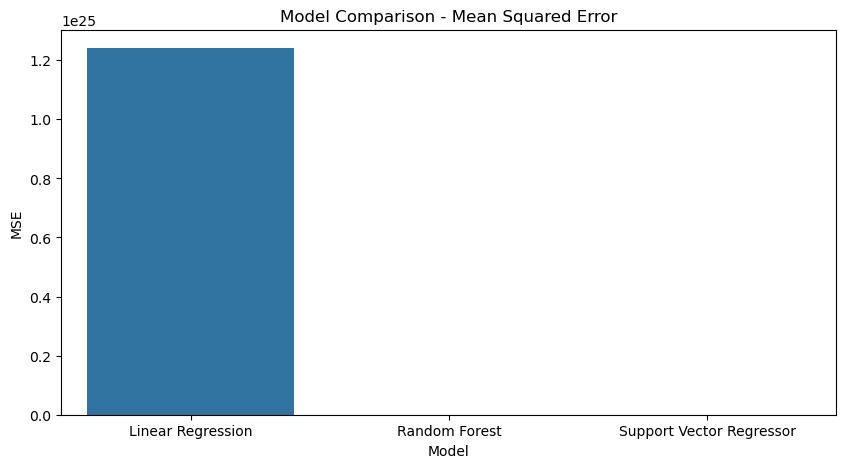

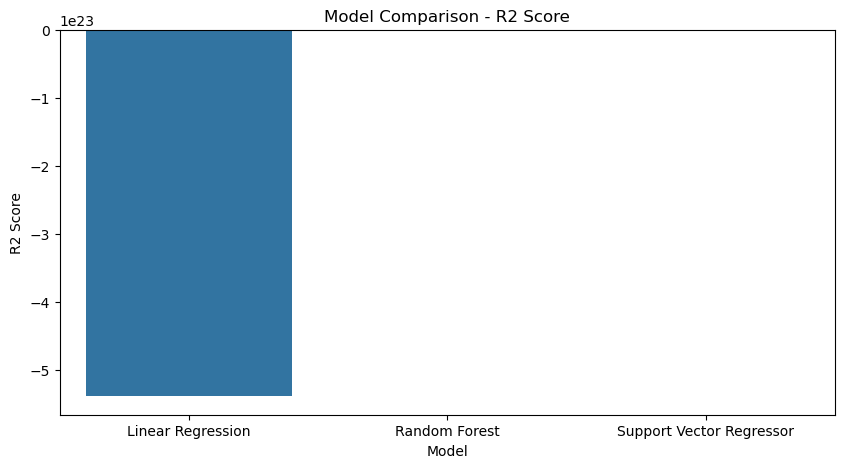

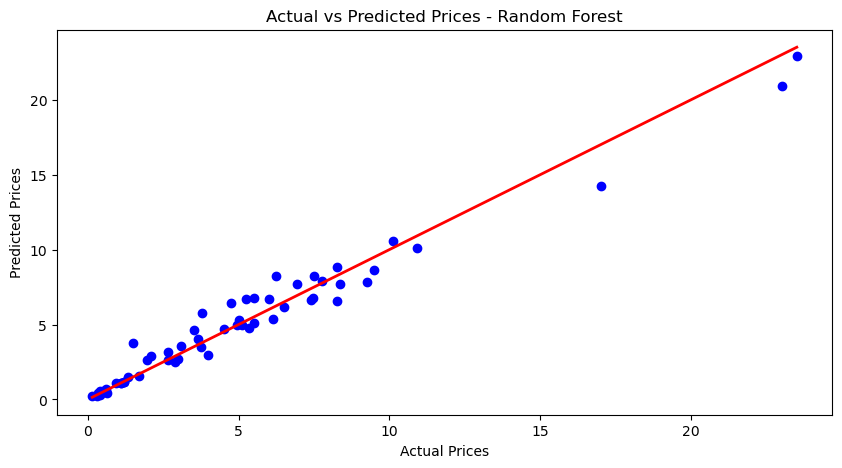

In [24]:
# Bar plot for MSE
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='MSE', data=models)
plt.title('Model Comparison - Mean Squared Error')
plt.show()

# Bar plot for R2 Score
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='R2 Score', data=models)
plt.title('Model Comparison - R2 Score')
plt.show()

# Actual vs Predicted Prices for the best model
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - Random Forest')
plt.show()